# Characters Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist), a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

**Student surname**: Ninni

**Student name**: Daniele

**ID Number**: 2044721

In [1]:
# load the required packages and check scikit-learn version
%matplotlib inline  
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
print('scikit-learn version:', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version: 0.24.1


In [2]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO

Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2044721
np.random.seed(ID)

In [4]:
# load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])

# rescale the data
X = X/255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
# random permute the data and split into training and test taking the first 600 data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
labelsT, freqsT = np.unique(y_test, return_counts=True)

# making sure that each label is present at least 10 times in 'y_train' and 'y_test'
while np.any(freqs<10) == True or np.any(freqsT<10) == True:
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
    y_train, y_test = y[:m_training], y[m_training:m_training+m_test]
    labels, freqs = np.unique(y_train, return_counts=True)
    labelsT, freqsT = np.unique(y_test, return_counts=True)

print("Labels in the training set:", labels)
print("Frequencies in the training set:", freqs)
print("Labels in the test set:", labelsT)
print("Frequencies in the test set:", freqsT)

Labels in the training set: [0 1 2 3 4 5 6 7 8 9]
Frequencies in the training set: [53 65 67 53 60 69 69 58 49 57]
Labels in the test set: [0 1 2 3 4 5 6 7 8 9]
Frequencies in the test set: [424 406 415 381 410 392 393 378 390 411]


In [6]:
# function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28, 28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i" % labels[index])
    return

INPUT:


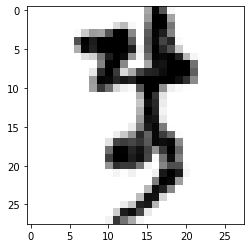

LABEL: 6



INPUT:


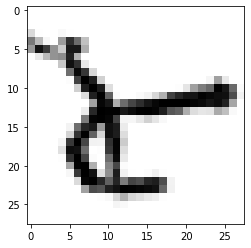

LABEL: 9



INPUT:


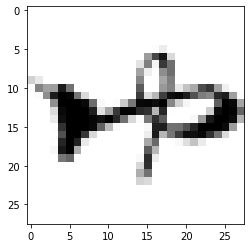

LABEL: 0


In [7]:
# let's try the plotting function
plot_input(X_train, y_train, 10)
print("\n\n")
plot_input(X_test, y_test, 100)
print("\n\n")
plot_input(X_test, y_test, 1000)

## TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.

In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!
parameters = {'hidden_layer_sizes':[(10,), (20,), (40,), (20, 20), (40, 20, 10)]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

# recall to use cv=kf to use the k-fold subdivision seen in the lectures
mlp = MLPClassifier(solver='sgd', alpha=1e-4, learning_rate_init=.1, max_iter=200, random_state=ID, tol=1e-4)
clf = GridSearchCV(estimator=mlp, param_grid=parameters, cv=kf)
clf.fit(X_train, y_train)
best_NN = clf.best_estimator_

print('RESULTS FOR NN')
print("Best parameters set found:", clf.best_params_)
print("Score with best parameters:", clf.best_score_)
print("All scores on the grid:")
import pandas as pd
pd.DataFrame(clf.cv_results_)

RESULTS FOR NN
Best parameters set found: {'hidden_layer_sizes': (40,)}
Score with best parameters: 0.725
All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.418150,0.044017,0.000000,0.000000,"(10,)","{'hidden_layer_sizes': (10,)}",0.666667,0.683333,0.633333,0.675000,0.650000,0.661667,0.017951,5
1,0.366792,0.010188,0.000200,0.000400,"(20,)","{'hidden_layer_sizes': (20,)}",0.716667,0.683333,0.675000,0.691667,0.708333,0.695000,0.015456,2
2,0.393735,0.015293,0.003126,0.006252,"(40,)","{'hidden_layer_sizes': (40,)}",0.766667,0.716667,0.691667,0.725000,0.725000,0.725000,0.024152,1
3,0.199965,0.020673,0.003124,0.006249,"(20, 20)","{'hidden_layer_sizes': (20, 20)}",0.700000,0.650000,0.666667,0.691667,0.725000,0.686667,0.026141,3
4,0.320579,0.038698,0.000200,0.000400,"(40, 20, 10)","{'hidden_layer_sizes': (40, 20, 10)}",0.700000,0.675000,0.625000,0.641667,0.716667,0.671667,0.034400,4


## TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples).
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folds we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!
parameters = {'batch_size':[1, 32, 480]}

from sklearn.base import clone
mlp = clone(best_NN)
clf = GridSearchCV(estimator=mlp, param_grid=parameters, cv=kf)
clf.fit(X_train, y_train)
best_NN = clf.best_estimator_

print('RESULTS FOR NN')
print("Best parameters set found:", clf.best_params_)
print("Score with best parameters:", clf.best_score_)
print("All scores on the grid:")
pd.DataFrame(clf.cv_results_)

RESULTS FOR NN
Best parameters set found: {'batch_size': 32}
Score with best parameters: 0.7416666666666666
All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.153522,3.114107,0.000000,0.000000,1,{'batch_size': 1},0.083333,0.125000,0.083333,0.125000,0.083333,0.100000,0.020412,3
1,0.262504,0.015314,0.000000,0.000000,32,{'batch_size': 32},0.758333,0.783333,0.683333,0.733333,0.750000,0.741667,0.033333,1
2,0.406478,0.009913,0.003122,0.006244,480,{'batch_size': 480},0.750000,0.700000,0.691667,0.733333,0.733333,0.721667,0.022111,2


## QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

For different architectures, as regards the fit time:
- number of layers fixed: the fit time does not necessarily increase with the number of neurons;
- number of neurons fixed: the fit time seems to decrease with the increase in the number of layers;
- in general: the fit time does not necessarily decrease with the increase in the total number of neurons and layers.

For different architectures, as regards the score:
- number of layers fixed: the score seems to increase with the number of neurons;
- number of neurons fixed: the score seems to decrease with the increase in the number of layers;
- quite similar scores, all between 0.66 and 0.73;
- in general: the score does not necessarily increase with the total number of neurons and layers.

For different batch sizes, as regards the fit time:
- as the batch size increases, the fit time seems to decrease until it stabilizes and then begins to fluctuate;
- more than 100 iterations are needed for the training to converge at all batch sizes;
- baseline SGD is much slower than both standard GD and mini-batch GD;
- in general: the fit time does not necessarily decrease with the increase in the batch size.

For different batch sizes, as regards the score:
- as the batch size increases, the score seems to increase until it stabilizes and then begins to fluctuate;
- baseline SGD is much worse than both standard GD and mini-batch GD;
- in general: the score does not necessarily increase with the batch size.

## TO DO 3

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab).

Training MLP of size (10,) ...
Done, training time: 0.68 sec

Training MLP of size (20,) ...
Done, training time: 0.26 sec

Training MLP of size (20, 20) ...
Done, training time: 0.29 sec

Training MLP of size (40,) ...
Done, training time: 0.32 sec

Training MLP of size (40, 20, 10) ...
Done, training time: 0.33 sec



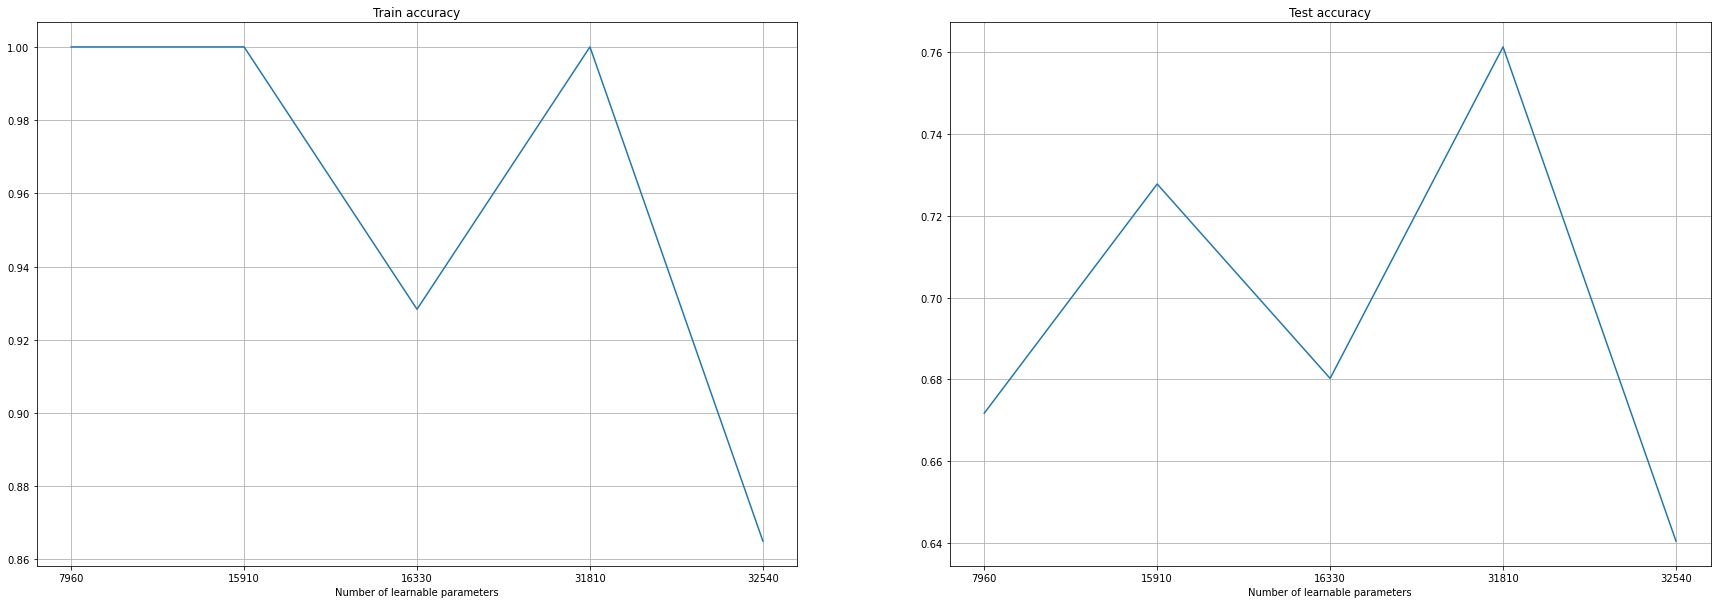

In [10]:
import time
from functools import reduce

# function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1, len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = np.array([(10,), (20,), (40,), (20, 20), (40, 20, 10)], dtype=object)
hl_labels = np.array([param_count(t) for t in hl_sizes])
idx = np.argsort(hl_labels)   # sorting both 'hl_sizes' and 'hl_labels' in ascending order w.r.t. the number of learnable parameters, otherwise the plot would be meaningless!
hl_sizes = hl_sizes[idx]
hl_labels = hl_labels[idx]
train_acc_list, test_acc_list = [], []
ti = time.time()

for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = clone(best_NN)
    mlp.set_params(hidden_layer_sizes=hl_size)
    mlp.fit(X_train, y_train)
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable parameters')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0, len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable parameters')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0, len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)

## QUESTION 2

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course.

## [ANSWER TO QUESTION 2]

It can be observed that both the training accuracy and the test accuracy have a very unstable behaviour! However, both assume the minimum value in correspondence with the architecture characterized by the largest number of learnable parameters, i.e. the one of size $(40, 20, 10)$. This is probably due to the fact that, for the latter architecture, the number of learnable parameters is too large compared to the size of the training set!

In general, the best architecture should be the one that leads to the best trade-off between precisely fitting the training set (i.e. minimizing the training error, with the risk of overfitting) and finding a less accurate but more general solution (i.e. minimizing the test error).
Therefore, given the trends of the training accuracy and of the test accuracy as a function of the number of learnable parameters, it is reasonable to assume that the best architecture is the one of size $(40,)$. This assumption is confirmed by the cross validation carried out in "TO DO 1".

Note that:
- a lower number of learnable parameters would increase the risk of underfitting the model (i.e. it would lead to an increase in both the training error and the test error);
- a larger number of learnable parameters would not only increase the risk of overfitting the model (i.e. it would lead to an increase in the test error) but also could lead to an increase in the training error because increasingly complex neural networks require more and more data in order to be trained properly! 

## TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e. the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations.

Training MLP using learning rate = 0.0002 ...
Done, training time: 14.71 sec

Training MLP using learning rate = 0.002 ...
Done, training time: 3.92 sec

Training MLP using learning rate = 0.02 ...
Done, training time: 1.05 sec

Training MLP using learning rate = 0.2 ...
Done, training time: 0.67 sec

RESULTS FOR NN
Best parameters set found: {'learning_rate_init': 0.02}
Score with best parameters: 0.7266666666666668
All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate_init,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.618005,0.926990,0.0,0.0,0.0002,{'learning_rate_init': 0.0002},0.758333,0.708333,0.708333,0.708333,0.733333,0.723333,0.020000,2
1,2.444648,0.104278,0.0,0.0,0.002,{'learning_rate_init': 0.002},0.750000,0.716667,0.700000,0.716667,0.725000,0.721667,0.016330,3
2,0.643995,0.015433,0.0,0.0,0.02,{'learning_rate_init': 0.02},0.775000,0.700000,0.708333,0.725000,0.725000,0.726667,0.026034,1
3,0.203829,0.042955,0.0,0.0,0.2,{'learning_rate_init': 0.2},0.783333,0.666667,0.716667,0.683333,0.725000,0.715000,0.040277,4


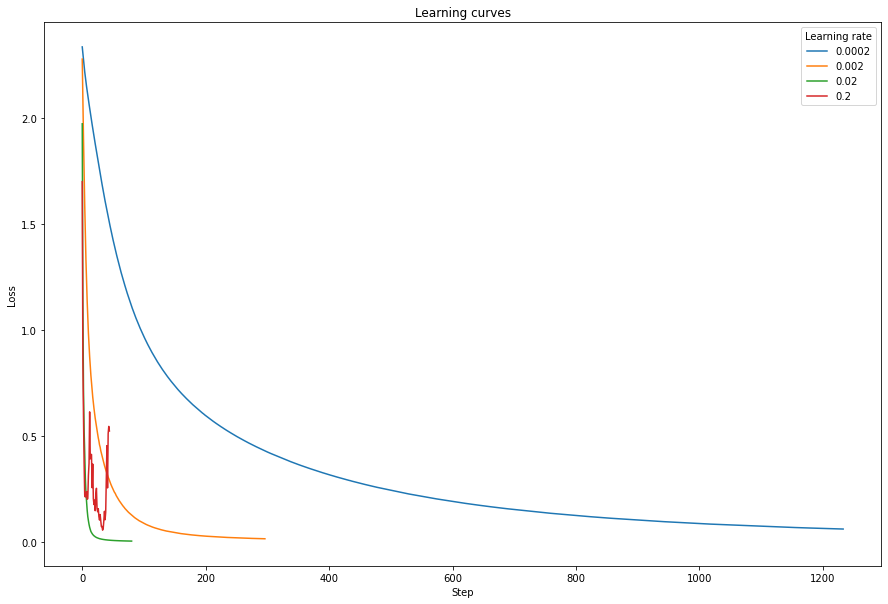

In [11]:
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]
fig, ax = plt.subplots(figsize=(15, 10))
ti = time.time()

for lr in lr_list:
    print('Training MLP using learning rate = {} ...'.format(lr))
    mlp = clone(best_NN)
    mlp.set_params(learning_rate_init=lr, max_iter=1500)
    mlp.fit(X_train, y_train)
    ax.plot(mlp.loss_curve_, label=lr)
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

ax.set_xlabel("Step")
ax.set_ylabel("Loss")
ax.set_title("Learning curves")
ax.legend(title='Learning rate')

parameters = {'learning_rate_init':lr_list}
mlp = clone(best_NN)
mlp.set_params(max_iter=1500)
clf = GridSearchCV(estimator=mlp, param_grid=parameters, cv=kf)
clf.fit(X_train, y_train)
best_NN = clf.best_estimator_

print('RESULTS FOR NN')
print("Best parameters set found:", clf.best_params_)
print("Score with best parameters:", clf.best_score_)
print("All scores on the grid:")
pd.DataFrame(clf.cv_results_)

## QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence?

## [ANSWER TO QUESTION 3]

In terms of stability:
- the red curve is the most unstable and doesn't manage to converge to 0 because perhaps the corresponding learning rate $(0.2)$ is too large;
- all the other curves are much more stable and manage to converge smoothly to 0.

In terms of speed of convergence: the larger the learning rate, the faster the convergence.

In general, the best learning rate should be the one that leads to the best trade-off between stability and speed of convergence, i.e. the one that leads to a learning curve that converges to 0 both smoothly and rather quickly.
Therefore, given the trends of the learning curves, it is reasonable to assume that the best learning rate is $0.02$. This assumption is confirmed by the cross validation carried out in "TO DO 4".

## TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).

RESULTS FOR BEST NN
Best NN training error: 0.0
Best NN test error: 0.26125


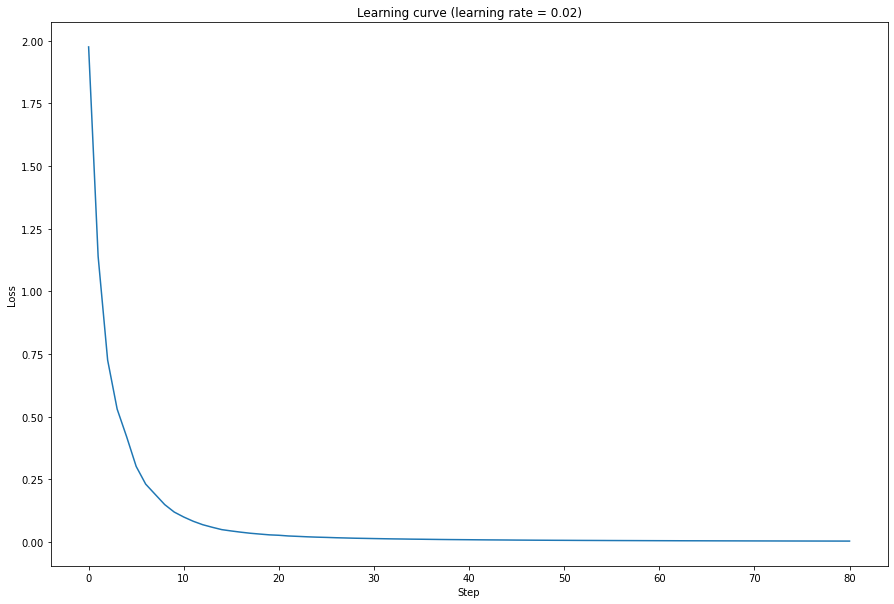

In [12]:
# get training and test error for the best NN model from CV
best_NN.fit(X_train, y_train)
training_error = 1-best_NN.score(X_train, y_train)
test_error = 1-best_NN.score(X_test, y_test)

print('RESULTS FOR BEST NN')
print("Best NN training error:", training_error)
print("Best NN test error:", test_error)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(best_NN.loss_curve_)
ax.set_xlabel("Step")
ax.set_ylabel("Loss")
ax.set_title('Learning curve (learning rate = {})'.format(best_NN.get_params()['learning_rate_init']))
plt.show()

## More data

Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)

print("Labels in the training set:", labels)
print("Frequencies in the training set:", freqs)

Labels in the training set: [0 1 2 3 4 5 6 7 8 9]
Frequencies in the training set: [421 413 391 359 418 396 398 400 388 416]


## TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [14]:
# use best architecture and parameters from before
large_NN = clone(best_NN)
#large_NN.set_params(verbose=True)
large_NN.fit(X_train, y_train)

# get training and test error for the NN
training_error = 1-large_NN.score(X_train, y_train)
test_error = 1-large_NN.score(X_test, y_test)

print('RESULTS FOR NN')
print("NN training error:", training_error)
print("NN test error:", test_error)

RESULTS FOR NN
NN training error: 0.0
NN test error: 0.13857142857142857


## QUESTION 4

Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

## [ANSWER TO QUESTION 4]

Results:

| Model | Training error | Test error | Training time $(s)$ |
| :-: | :-: | :-: | :-: |
| NN $(m = 600)$ | 0 | 0.2613 | 1.1 |
| NN $(m = 4000)$ | 0 | 0.1386 | 5.9 |

It can be observed that training the NN with $m = 4000$ instead of $m = 600$ led to:
- a decrease in the test error of about 47%;
- a training time of about 5 times longer.

This is in line with the expectations: as $m$ increases, both test accuracy and training time increase!

## TO DO 7

Plot an example that was misclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

Example of a character that is misclassified by NN with m_training=600 and correctly classified by NN with m_training=4000:
INPUT:


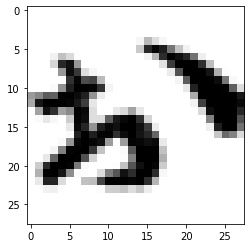

LABEL: 0
Label predicted by NN with m_training=600: 5
Label predicted by NN with m_training=4000: 0


In [15]:
NN_prediction = best_NN.predict(X_test)
large_NN_prediction = large_NN.predict(X_test)
for i in range(m_test):
    if NN_prediction[i] != y_test[i] and large_NN_prediction[i] == y_test[i]:
        break

print("Example of a character that is misclassified by NN with m_training=600 and correctly classified by NN with m_training=4000:")
plot_input(X_test, y_test, i)
print("Label predicted by NN with m_training=600:", NN_prediction[i])
print("Label predicted by NN with m_training=4000:", large_NN_prediction[i])

## TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (i.e. replace mlp, mlp_large with your estimators) in order to have it working with your implementation.

Weights with 600 data points:


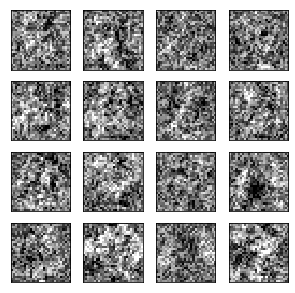

Weights with 4000 data points:


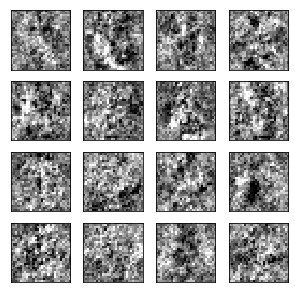

In [16]:
print("Weights with 600 data points:")
fig, axes = plt.subplots(4, 4, figsize=(5, 5))
vmin, vmax = best_NN.coefs_[0].min(), best_NN.coefs_[0].max()
for coef, ax in zip(best_NN.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5*vmin, vmax=.5*vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

print("Weights with 4000 data points:")
fig, axes = plt.subplots(4, 4, figsize=(5, 5))
vmin, vmax = large_NN.coefs_[0].min(), large_NN.coefs_[0].max()
for coef, ax in zip(large_NN.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5*vmin, vmax=.5*vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

## [ANSWER TO QUESTION 5]

It is extremely difficult to get relevant information about what is happening in the neural network just by looking at the weights. However, the weights obtained with $m = 600$ data points seem to be characterized by a higher sharpness and contrast.

## TO DO 9

Take the best SVM model and its parameters you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [17]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting
best_SVM = SVC(kernel='rbf', C=10, gamma=0.01)
best_SVM.fit(X_train, y_train)
SVM_training_error = 1-best_SVM.score(X_train, y_train)
SVM_test_error = 1-best_SVM.score(X_test, y_test)

print('RESULTS FOR SVM')
print("SVM training error:", SVM_training_error)
print("SVM test error:", SVM_test_error)

RESULTS FOR SVM
SVM training error: 0.0
SVM test error: 0.07240000000000002


In [18]:
from sklearn import linear_model

# you can re-use your code from Lab 2
regL2 = linear_model.LogisticRegression(C=1, max_iter=500)
regL2.fit(X_train, y_train)
logreg_training_error = 1-regL2.score(X_train, y_train)
logreg_test_error = 1-regL2.score(X_test, y_test)

print('RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')
print("Regularized logistic regression training error:", logreg_training_error)
print("Regularized logistic regression test error:", logreg_test_error)

RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Regularized logistic regression training error: 0.028800000000000048
Regularized logistic regression test error: 0.2318


## QUESTION 6

Compare the results of Logistic Regression, SVM and NN. Which one achieves the best results?

## [ANSWER TO QUESTION 6]

Results:

| Model | Training error | Test error | Training time $(s)$ |
| :-: | :-: | :-: | :-: |
| NN $(m = 600)$ | 0 | 0.2613 | 1.1 |
| NN $(m = 4000)$ | 0 | 0.1386 | 5.9 |
| SVM | 0 | 0.0724 | 29.9 |
| Logistic regression | 0.0288 | 0.2318 | 4.3 |

Observations:
- the NN with $m = 600$ and the logistic regression led to similar results in terms of test error, but the logistic regression's training time is about 4 times longer;
- the NN with $m = 600$ is the one that achieves the lowest accuracy (about 74%), but is also the one with the shortest training time;
- the SVM is the one that achieves the highest accuracy (about 93%), but its training time is about 5 times longer than that of the 2nd best model, i.e. the NN with $m = 4000$.